In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

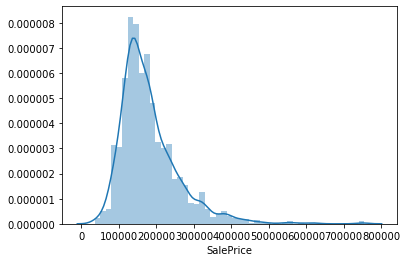

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
print('Skewness:%f'%df_train['SalePrice'].skew())  # 计算偏度
print('Kurtosis:%f'%df_train['SalePrice'].kurt())   #计算

Skewness:1.882876
Kurtosis:6.536282


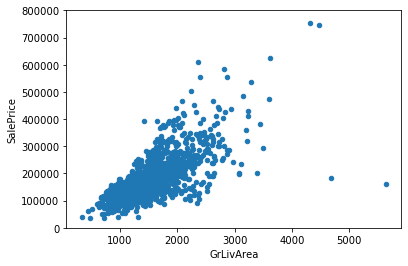

In [10]:
# 居住面积
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

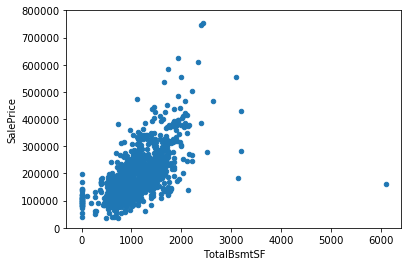

In [11]:
# 地下室面积
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

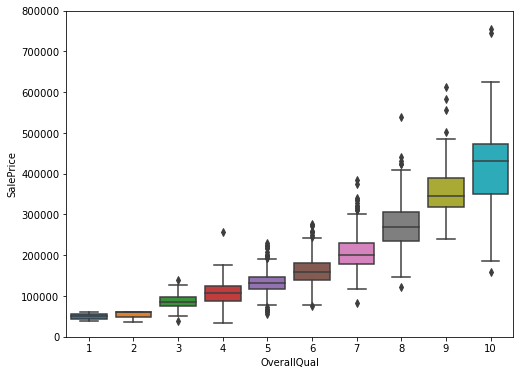

In [12]:
#整体材料的质量
var = 'OverallQual'
data =  pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

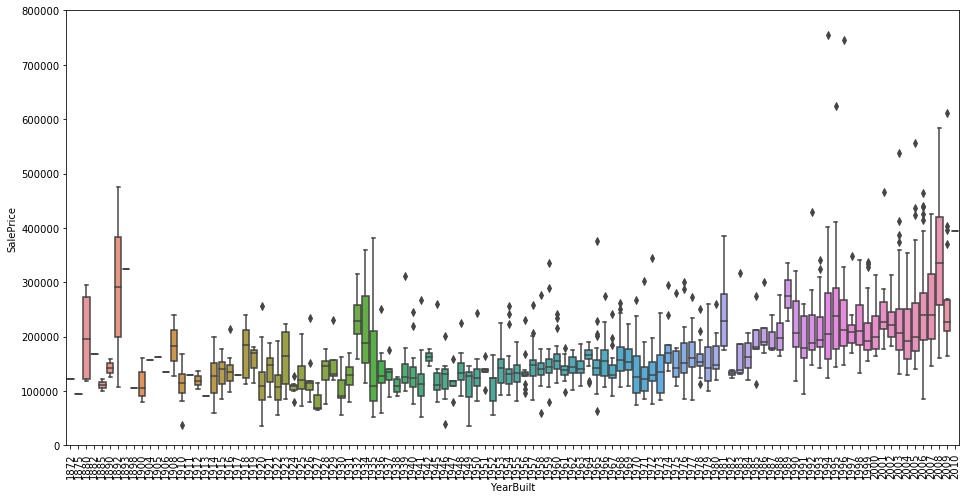

In [7]:
# 建造时间
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df_train = pd.read_csv('./data/train.csv')
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

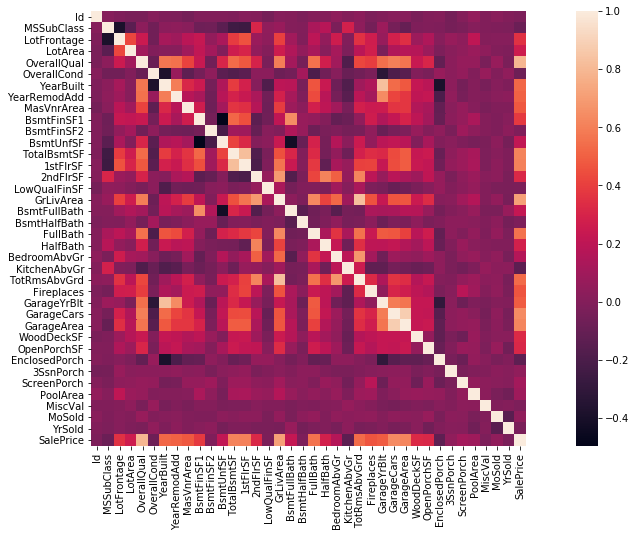

In [9]:
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(18,8))
sns.heatmap(corrmat,square=True)

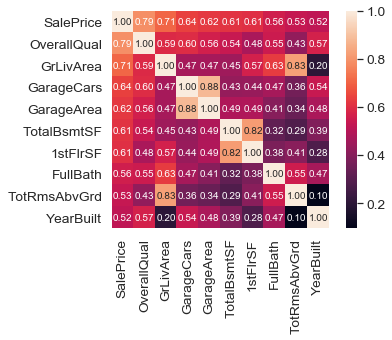

In [25]:
k=10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
hm

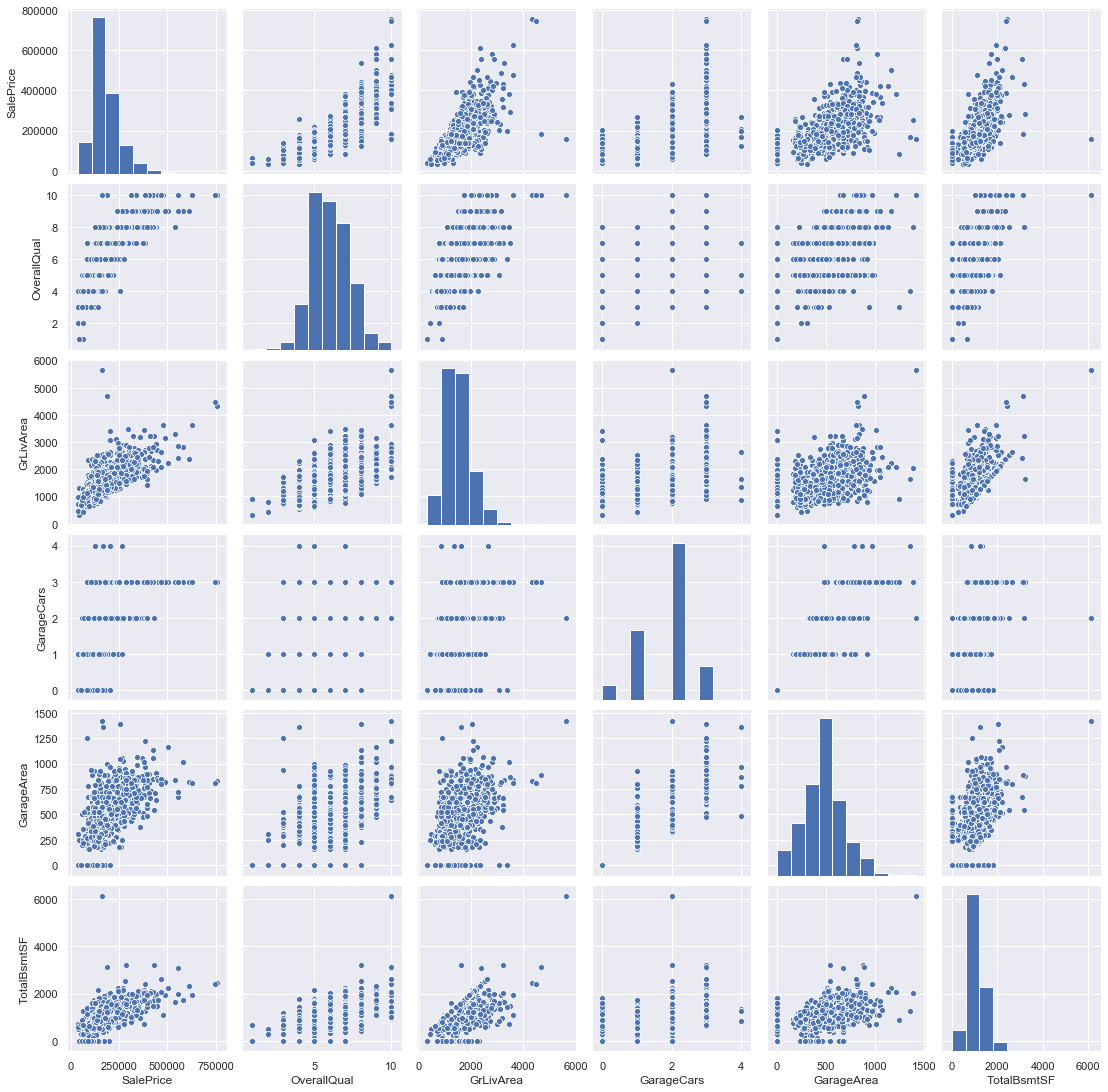

In [29]:
sns.set()
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
sns.pairplot(df_train[cols[0:6]],size=2.5)

In [43]:
# missing data
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [49]:
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print('The train data size before dropping Id feature is :{}'.format(train.shape))
print('The train data size before dropping Id feature is :{}'.format(test.shape))
train_ID = train['Id']
test_ID = test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
print('The train data size after dropping Id feature is :{}'.format(train.shape))
print('The train data size after dropping Id feature is :{}'.format(test.shape))

The train data size before dropping Id feature is :(1460, 81)
The train data size before dropping Id feature is :(1459, 80)
The train data size after dropping Id feature is :(1460, 80)
The train data size after dropping Id feature is :(1459, 79)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


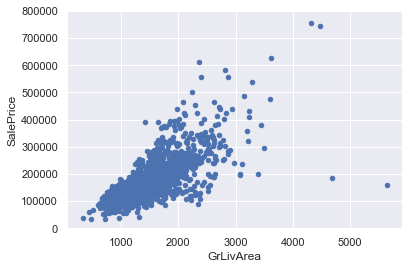

In [57]:
# 发现离群点
var = 'GrLivArea'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

In [64]:
(train['GrLivArea']>4000) & (train['SalePrice']<300000)

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1458, dtype: bool

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


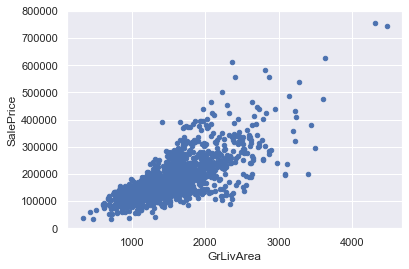

In [58]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
var = 'GrLivArea'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

mu = 180932.92 and sigma = 79467.79


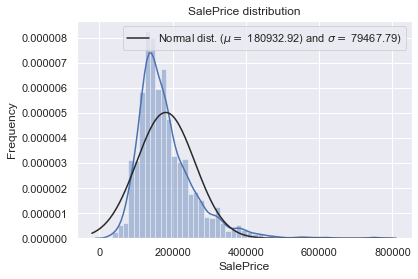

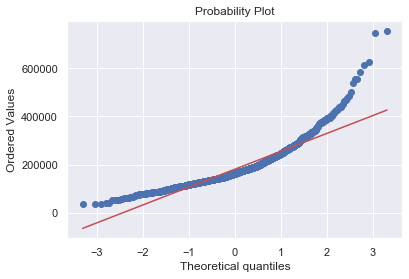

In [71]:
sns.distplot(train['SalePrice'],fit=norm)
mu,sigma = norm.fit(train['SalePrice']) 
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

# 分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f}) and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ图
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

mu = 2.57 and sigma = 0.03


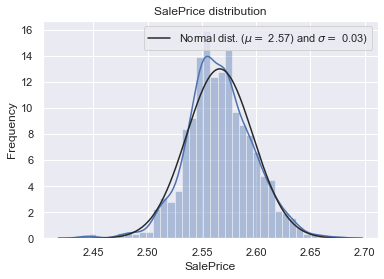

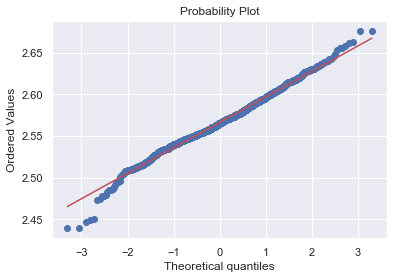

In [73]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
mu,sigma = norm.fit(train['SalePrice']) 
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

# 分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f}) and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ图
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [85]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
all_data.shape

(2917, 79)

In [84]:
all_data_na = all_data.isnull().sum()/all_data.isnull().count()
all_data_na.sort_values(ascending=False).head(20)*100

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageFinish     5.450806
GarageQual       5.450806
GarageYrBlt      5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtCond         2.811107
BsmtExposure     2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtHalfBath     0.068564
dtype: float64

In [86]:
all_data['PoolQC'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

In [87]:
# 像是否有游泳池这种情况来考虑的话一般填充为none
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['PoolQC'].head(5)

0    None
1    None
2    None
3    None
4    None
Name: PoolQC, dtype: object

In [88]:
# 没有特征
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [89]:
# 通道的入口
all_data['Alley'] = all_data['Alley'].fillna('None')

In [90]:
# 栅栏
all_data['Fence'] = all_data['Fence'].fillna('None')

In [91]:
# 壁炉
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [92]:
# 到街道的距离
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [97]:
# 车库
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [99]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [101]:
# 地下室
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [102]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [103]:
# 砌体
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [105]:
all_data['MSZoning'].mode()[0]

'RL'

In [106]:
# 一般分区分类，众数
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [107]:
# Functional家庭功能评定
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [108]:
# 电力系统
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [109]:
# 厨房的品质
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [110]:
# 外部
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [111]:
# 销售类型
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [113]:
# 建筑类型
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

In [114]:
all_data['Utilities']

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
2912    AllPub
2913    AllPub
2914    AllPub
2915    AllPub
2916    AllPub
Name: Utilities, Length: 2917, dtype: object

In [115]:
all_data = all_data.drop(['Utilities'],axis=1)

In [116]:
all_data_na = all_data.isnull().sum()/all_data.isnull().count()
all_data_na.sort_values(ascending=False).head(20)*100

YrSold           0.0
Foundation       0.0
ExterCond        0.0
ExterQual        0.0
Exterior1st      0.0
Exterior2nd      0.0
Fence            0.0
FireplaceQu      0.0
Fireplaces       0.0
FullBath         0.0
Electrical       0.0
Functional       0.0
GarageArea       0.0
GarageCars       0.0
GarageCond       0.0
GarageFinish     0.0
GarageQual       0.0
GarageType       0.0
EnclosedPorch    0.0
Condition2       0.0
dtype: float64

In [118]:
# 有些并不是连续值，给他们做成类别值吧
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [126]:
# 使用sklearn进行标签映射
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu','BsmtQual','BsmtCond','GarageQual','GarageCond',
        'ExterQual','ExterCond','HeatingQC','PoolQC','KitchenQual','BsmtFinType1',
        'BsmtFinType1','Functional','Fence','BsmtExposure','GarageFinish','LandSlope',
        'LotShape','PavedDrive','Street','Alley','CentralAir','MSSubClass','OverallCond',
        'YrSold','MoSold')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
all_data['FireplaceQu']

0       3
1       5
2       5
3       2
4       5
       ..
2912    3
2913    3
2914    5
2915    3
2916    5
Name: FireplaceQu, Length: 2917, dtype: int64

In [124]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [125]:
#计算偏度
from scipy.stats import norm,skew

numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [128]:
# Box_Cox变换使其满足正态分布
skewness = skewness[abs(skewness)> 0.75]
print('There are {}skewed numerical features to Box Cox transfrom'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam=0.15    #经验值0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat],lam)

There are 58skewed numerical features to Box Cox transfrom


In [129]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 226)


In [130]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [6]:
from sklearn.linear_model import ElasticNet,Lasso,BayesianRidge,LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [3]:
n_folds=5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,train.values,y_train,scoring='neg_mean_squared_error',cv = kf))
    return rmse

In [134]:
# make_pipline:级联起来做事   RobustScaler:更适合处理离群点
lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))

In [135]:
# ElasticNet同时使用了L1和L2
Enet = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

In [7]:
# KernelRidge带有核函数的岭回归
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [137]:
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                 min_samples_split=10,min_samples_leaf=15,max_depth=4,random_state=5,
                 max_features='sqrt')

In [138]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05,max_depth=3,
                             min_child_weight=1.7817,n_estimators=2200,reg_alpha=0.4640,reg_lambda=0.8571,
                             subsample=0.5213,silent=1,nthread=-1)

In [144]:
score = rmsle_cv(lasso)
print('\nLasso score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Lasso score: 0.0098(0.0006)



In [146]:
score = rmsle_cv(Enet)
print('\nENet score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))


ENet score: 0.0097(0.0006)



In [8]:
score = rmsle_cv(KRR)
print('\nKernelRidge score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))

NameError: name 'train' is not defined

In [ ]:
score = rmsle_cv(GBoost)
print('\nGBoost score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))

In [ ]:
score = rmsle_cv(model_xgb)
print('\nxgb score: {:.4f}({:.4f})\n'.format(score.mean(),score.std()))